<a href="https://colab.research.google.com/github/ewattudo/vis1/blob/main/ps2_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PS2 Manipulating Data and Merging - Erick Watt-Udogu 

I am generally interested in creating a model that will help explain who applied to  Rutgers-Camden's Graduate School of Arts and Sciences for the following terms: summer 2022, fall 2022 and spring 2023. 


aok fantastic! i'd be interested in that too--looking forward to it!


In this problem set I want to test the widely accepted claim that college enrollment broadly but graduate school specifically is countercyclical, i.e. graduate applications rise as the the economy worsens. For the sake of this learning experiment I am isolating counties in New Jersey, but my broader research question includes all state data. 


aok aha cool, then need data on recessions too, can see st loius FRED as we covered earlier in the class; can also or for future research zoom in onto south jersey and philly per recessions, say local median hh income, labor force partcipation, unemployment, layoffs, etc


To do this, I will be merging Rutgers-Camden application data for sans identifiers and unemployment data, where unemployment serves as a proxy for health of the economy. Because my data does not have county names, it has zip codes and the unemployment data is county, not zip code level, I am using a third data set to merge the two. 

aok good; and again ideally want local level measure of health of economy eg unemployment for south jersey and philly region

## **Import: Code**

This section includes import code. 

In [1]:
import os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter 
import numpy as np
from statistics import *

import pylab as plt
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)


import urllib  #weird, guess need to have os and pandas imported for this to work                                                  
                                                                          
import webbrowser                                                                      
import folium as f                                                                     
from folium.plugins import MarkerCluster, HeatMap                                      

#! pip install geocoder #]later maybe
! pip install geopandas #this is how you install packages on colab
import geopandas as gpd                                                                                       
#from geopy.geocoders import Nominatim #later maybe

import seaborn as sns

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 6.4 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


## **Importing and Cleaning the Data**
This section is code for importing and cleaning the data.



### Import: Data File 1: Application Data
This is data I retrieved from work. I cleaned identifying information. 

In [2]:

urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/appdata.csv", "appdata") #aok not a critical problem, didnt break anything; but as per custom do have .csv suffix

('appdata', <http.client.HTTPMessage at 0x7faf883f6fd0>)

In [3]:
os.getcwd() #pwd
os.listdir() #compare to clicking on the left the folder icon #dir

'/content'

['.config', 'appdata', 'sample_data']

In [4]:
appdat=pd.read_csv('appdata')

In [5]:
appdat.columns

Index(['ID ', 'Degree Type', 'Final Recommended Decision', 'Admit-Coming',
       'Application Created Date', 'Days Before the Beginning of Semester ',
       'Domestic or INTL Applicant', 'Reporting Term', 'Age When Applied',
       'Mailing Zip/Postal Code', 'Mailing State/Province', 'Mailing Country',
       'Most Recent Educational Institution: Account Name', 'Gender', 'Race',
       'Program Selection: Program Selection Name', 'Admissions Status'],
      dtype='object')

In [6]:
appdat.head(3)

,ID,Degree Type,Final Recommended Decision,Admit-Coming,Application Created Date,Days Before the Beginning of Semester,Domestic or INTL Applicant,Reporting Term,Age When Applied,Mailing Zip/Postal Code,Mailing State/Province,Mailing Country,Most Recent Educational Institution: Account Name,Gender,Race,Program Selection: Program Selection Name,Admissions Status
0,1,"Master's (e.g. MA, MS, EdM, MFA)",NaN,0,12/7/2021,273,International,Fall 2022,23.0,56407,Pradesh 2,Nepal,Vellore Institute Of Technolog,Male,Asian,Biology: Computational and Integrative (MS),Started App
1,2,"Master's (e.g. MA, MS, EdM, MFA)",NaN,0,1/2/2022,247,International,Fall 2022,21.0,380058,Gujarat,India,Ahmedabad University,Female,Asian,Biology: Computational and Integrative (MS),Started App
2,3,"Master's (e.g. MA, MS, EdM, MFA)",NaN,0,3/15/2022,175,Domestic,Fall 2022,22.0,07009-1245,New Jersey,United States,Mount Olive High School,Male,Asian,Biology: Computational and Integrative (MS),Started App


In [7]:
appdat.dtypes

ID                                                     int64
Degree Type                                           object
Final Recommended Decision                            object
Admit-Coming                                           int64
Application Created Date                              object
Days Before the Beginning of Semester                  int64
Domestic or INTL Applicant                            object
Reporting Term                                        object
Age When Applied                                     float64
Mailing Zip/Postal Code                               object
Mailing State/Province                                object
Mailing Country                                       object
Most Recent Educational Institution: Account Name     object
Gender                                                object
Race                                                  object
Program Selection: Program Selection Name             object
Admissions Status       

In [8]:
appdat = appdat.drop(['Degree Type','Domestic or INTL Applicant','Age When Applied'],axis=1)

In [9]:
appdat.head(3)

,ID,Final Recommended Decision,Admit-Coming,Application Created Date,Days Before the Beginning of Semester,Reporting Term,Mailing Zip/Postal Code,Mailing State/Province,Mailing Country,Most Recent Educational Institution: Account Name,Gender,Race,Program Selection: Program Selection Name,Admissions Status
0,1,NaN,0,12/7/2021,273,Fall 2022,56407,Pradesh 2,Nepal,Vellore Institute Of Technolog,Male,Asian,Biology: Computational and Integrative (MS),Started App
1,2,NaN,0,1/2/2022,247,Fall 2022,380058,Gujarat,India,Ahmedabad University,Female,Asian,Biology: Computational and Integrative (MS),Started App
2,3,NaN,0,3/15/2022,175,Fall 2022,07009-1245,New Jersey,United States,Mount Olive High School,Male,Asian,Biology: Computational and Integrative (MS),Started App


In [10]:
appdat = appdat.rename(columns={'Mailing Zip/Postal Code':"Zip", "Mailing State/Province":"State","Mailing Country":"Country" })
appdat.head(3)

,ID,Final Recommended Decision,Admit-Coming,Application Created Date,Days Before the Beginning of Semester,Reporting Term,Zip,State,Country,Most Recent Educational Institution: Account Name,Gender,Race,Program Selection: Program Selection Name,Admissions Status
0,1,NaN,0,12/7/2021,273,Fall 2022,56407,Pradesh 2,Nepal,Vellore Institute Of Technolog,Male,Asian,Biology: Computational and Integrative (MS),Started App
1,2,NaN,0,1/2/2022,247,Fall 2022,380058,Gujarat,India,Ahmedabad University,Female,Asian,Biology: Computational and Integrative (MS),Started App
2,3,NaN,0,3/15/2022,175,Fall 2022,07009-1245,New Jersey,United States,Mount Olive High School,Male,Asian,Biology: Computational and Integrative (MS),Started App


In [11]:
#I need to find the New Jersey Applicants, but I know the Zips and the State fields are not clean. I need to figure out what I am working with. 
print(appdat.State.unique())

['Pradesh 2' 'Gujarat' 'New Jersey' 'ENUGU' 'Telangana' 'Beijing'
 'Haryana' 'In-Tn' 'Yunnan' 'Lagos' 'Odisha' 'Delhi' 'Rajasthan'
 'West Bengal' 'Tamil Nadu' 'Maryland' 'Uttar Pradesh' 'IN' 'New York'
 'Ohio' nan 'west bengal' 'Shanxi' 'Assam' 'England'
 'Federal Capital Territory' 'mazandaran' 'Pennsylvania' 'Illinois'
 'Tehran' 'Delaware' 'Ardebi' 'Massachusetts' 'West Virginia' 'PA'
 'Virginia' 'NJ' 'In-Hr' 'AN' 'Rivers state' 'Baranya' 'Colorado'
 'Banasree' 'Plateau' 'Saint Catherine' 'Serekunda' 'Imo'
 'North Rhine-Westphalia' 'California' 'Anambra' 'Kerala' 'Eastern'
 'Ashanti' 'Washington' 'MAHARASHTRA' 'Punjab' 'Rhode Island' 'Dhaka'
 'Dhaka Division' 'Missouri' 'Bagmati' 'Seoul' 'Edo' 'Karnataka'
 'Maharashtra' 'Tamilnadu' 'Western Area' 'Kinondoni' 'LAGOS' 'Rivers'
 'TELANGANA' 'Ashanti Region' 'Ghana' 'Western Province' 'NY' 'Ondo'
 'Kiambu' 'Madhya Pradesh' 'Greater Accra' 'Kaduna' 'Isfahan' 'In-Dl'
 'Harare' 'New Hampshire' 'Indiana' 'Tabuk' 'FCT' 'Oregon' 'AP' 'Osun'
 '

Text(0.5, 1.0, 'Number of Applications by State: Domestic and International (Unclean)')

Text(0, 0.5, 'Number of Applicants')

Text(0.5, 0, 'States')

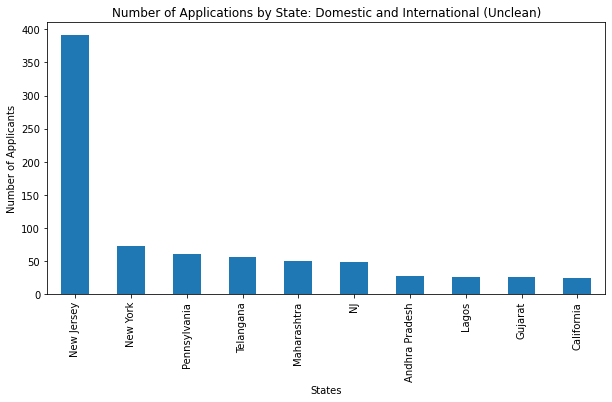

In [17]:
#Interesting that New York is higher than Pennsylvania. It's not that surprising though. It is surprising that we have almost as many applicants from states in India as Pennsylvania. 
appdat.State.value_counts().nlargest(10).plot(kind='bar',figsize=(10,5))
plt.title("Number of Applications by State: Domestic and International (Unclean)")
plt.ylabel("Number of Applicants")
plt.xlabel("States")
#aok yes very productive to interpret right away; then when you write up paper just copy-paste the comment and elaborate

In [19]:
appdat["State"].value_counts()

New Jersey       391
New York          73
Pennsylvania      60
Telangana         56
Maharashtra       50
                ... 
In-Rj              1
In-Up              1
AndhraPradesh      1
State              1
Sylhet             1
Name: State, Length: 264, dtype: int64

Text(0.5, 1.0, 'Number of Applications by Country (Unclean)')

Text(0, 0.5, 'Number of Applicants')

Text(0.5, 0, 'States')

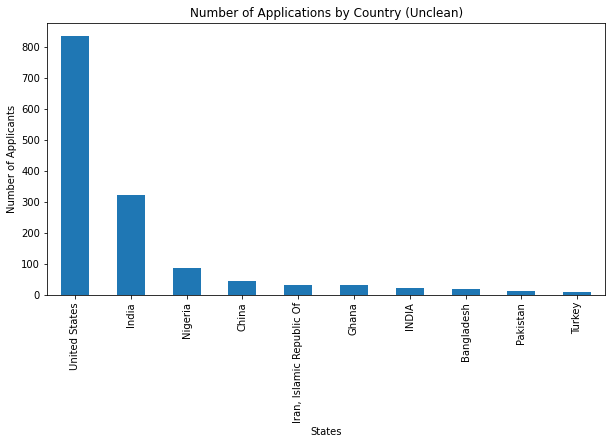

In [18]:
#I need to get rid of the non-US apps so I can get to the New Jersey Apps. I can't easily see the different ways that New Jersey if all the states from all the countries are listed. 
#We need some data validation. Even country names have junk
appdat.Country.value_counts().nlargest(10).plot(kind='bar',figsize=(10,5))
plt.title("Number of Applications by Country (Unclean)")
plt.ylabel("Number of Applicants")
plt.xlabel("States")

In [20]:
appdat["Country"].value_counts()

United States                835
India                        320
Nigeria                       85
China                         44
Iran, Islamic Republic Of     32
                            ... 
Singapore                      1
Hungary                        1
Senegal                        1
Kyrgyzstan                     1
Azerbaijan                     1
Name: Country, Length: 62, dtype: int64

In [ ]:
print(appdat.Country.unique())

['Nepal' 'India' 'United States' 'Nigeria' 'China' 'INDIA' 'Bangladesh'
 'United Kingdom' 'Iran, Islamic Republic Of' 'Turkey' 'Ghana'
 'Kyrgyzstan' 'Senegal' 'Korea, Republic of' 'Egypt' 'Hungary' 'Jamaica'
 'Singapore' 'Taiwan' 'Gambia' 'Germany' 'Pakistan' nan 'BANGLADESH'
 'United States of America' 'Sierra Leone' 'Tanzania, United Republic of'
 'Sri Lanka' 'Kenya' 'Zimbabwe' 'Saudi Arabia' 'Trinidad and Tobago'
 'South Africa' 'Malawi' 'Italy' 'France' 'Hong Kong' 'Liberia'
 'Taiwan, Province Of China' 'Mexico' 'Russian Federation' 'Canada'
 'United Arab Emirates' 'Brazil' 'Bahrain' 'Morocco' 'Kuwait' 'Uruguay'
 'Qatar' 'Bahamas' 'Puerto Rico' 'Peru' 'Philippines' 'Costa Rica'
 'Greece' 'Estonia' 'Malaysia' 'Lebanon' 'Latvia' 'Israel' 'Belgium'
 'Cameroon' 'Azerbaijan']


In [21]:
usappdat = appdat.query("Country=='United States'")
usappdat.head(3)

,ID,Final Recommended Decision,Admit-Coming,Application Created Date,Days Before the Beginning of Semester,Reporting Term,Zip,State,Country,Most Recent Educational Institution: Account Name,Gender,Race,Program Selection: Program Selection Name,Admissions Status
2,3,NaN,0,3/15/2022,175,Fall 2022,07009-1245,New Jersey,United States,Mount Olive High School,Male,Asian,Biology: Computational and Integrative (MS),Started App
3,4,NaN,0,3/31/2022,159,Fall 2022,07726-4660,New Jersey,United States,Suny Colg Geneseo,Female,Hispanic or Latino; White,Biology: Computational and Integrative (MS),Started App
5,6,NaN,0,4/20/2022,272,Spring 2023,08755-1914,New Jersey,United States,Essex County College,Male,Black or African American,Biology: Computational and Integrative (MS),Started App


In [24]:
#This is much easier to read. I can see the multiple ways New Jersey is listed in the data. I now need to isolate New Jersey. 
print(usappdat.State.unique())

['New Jersey' 'Maryland' 'New York' 'Ohio' 'Pennsylvania' 'Illinois'
 'Delaware' 'Massachusetts' 'West Virginia' 'PA' 'Virginia' 'Colorado'
 'California' 'Washington' 'Rhode Island' 'Missouri' 'NY' 'New Hampshire'
 'Indiana' 'Oregon' 'AP' 'AZ' 'FL' 'Arizona' 'Texas' 'Wisconsin'
 'North Carolina' 'Minnesota' 'Georgia' 'Iowa' 'Alabama' 'MA' 'Tennessee'
 'Mississippi' 'District Of Columbia' 'Florida' 'Montana' 'Connecticut'
 'WI' 'OH' 'MD' 'Vermont' 'Lousiana' 'Nevada' 'MI' 'CA' 'Michigan' 'DC'
 'TX' 'Louisiana' 'Idaho' 'Kansas' 'CT' 'RI' 'md' 'AE' 'IN' 'NM'
 'Nebraska' 'Maine' 'Arkansas' 'texas' 'Armed Forces' 'New Mexico'
 'South Carolina' 'District of Columbia' 'KS' 'pa' 'OK' 'KY']


In [23]:
usappdat['State']=usappdat['State'].replace(['NJ','Nj','new jersey','nj'],'New Jersey')

<ipython-input-23-4fbae95450e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usappdat['State']=usappdat['State'].replace(['NJ','Nj','new jersey','nj'],'New Jersey')


In [25]:
print(usappdat.State.unique()) #aok: not necessarily now, again we want to be efficient and only do whats necessary; but do make a note for yourself like eg:
#KLUDGE or BUG or LATER: fix other states eg pa PA Pennsylvania etc
#btw this can be probably easily fixed from the getgo: probably applicant types in state into box
#contact IT to have a drop-down menu, then everything will be consistent

['New Jersey' 'Maryland' 'New York' 'Ohio' 'Pennsylvania' 'Illinois'
 'Delaware' 'Massachusetts' 'West Virginia' 'PA' 'Virginia' 'Colorado'
 'California' 'Washington' 'Rhode Island' 'Missouri' 'NY' 'New Hampshire'
 'Indiana' 'Oregon' 'AP' 'AZ' 'FL' 'Arizona' 'Texas' 'Wisconsin'
 'North Carolina' 'Minnesota' 'Georgia' 'Iowa' 'Alabama' 'MA' 'Tennessee'
 'Mississippi' 'District Of Columbia' 'Florida' 'Montana' 'Connecticut'
 'WI' 'OH' 'MD' 'Vermont' 'Lousiana' 'Nevada' 'MI' 'CA' 'Michigan' 'DC'
 'TX' 'Louisiana' 'Idaho' 'Kansas' 'CT' 'RI' 'md' 'AE' 'IN' 'NM'
 'Nebraska' 'Maine' 'Arkansas' 'texas' 'Armed Forces' 'New Mexico'
 'South Carolina' 'District of Columbia' 'KS' 'pa' 'OK' 'KY']


In [26]:
njappdat = usappdat.query("State=='New Jersey'")
njappdat.head(3)

,ID,Final Recommended Decision,Admit-Coming,Application Created Date,Days Before the Beginning of Semester,Reporting Term,Zip,State,Country,Most Recent Educational Institution: Account Name,Gender,Race,Program Selection: Program Selection Name,Admissions Status
2,3,NaN,0,3/15/2022,175,Fall 2022,07009-1245,New Jersey,United States,Mount Olive High School,Male,Asian,Biology: Computational and Integrative (MS),Started App
3,4,NaN,0,3/31/2022,159,Fall 2022,07726-4660,New Jersey,United States,Suny Colg Geneseo,Female,Hispanic or Latino; White,Biology: Computational and Integrative (MS),Started App
5,6,NaN,0,4/20/2022,272,Spring 2023,08755-1914,New Jersey,United States,Essex County College,Male,Black or African American,Biology: Computational and Integrative (MS),Started App


In [27]:
njappdat['C_Zip']=njappdat['Zip'].str[:5]
njappdat.head(3)

<ipython-input-27-088877dd01eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  njappdat['C_Zip']=njappdat['Zip'].str[:5]


,ID,Final Recommended Decision,Admit-Coming,Application Created Date,Days Before the Beginning of Semester,Reporting Term,Zip,State,Country,Most Recent Educational Institution: Account Name,Gender,Race,Program Selection: Program Selection Name,Admissions Status,C_Zip
2,3,NaN,0,3/15/2022,175,Fall 2022,07009-1245,New Jersey,United States,Mount Olive High School,Male,Asian,Biology: Computational and Integrative (MS),Started App,07009
3,4,NaN,0,3/31/2022,159,Fall 2022,07726-4660,New Jersey,United States,Suny Colg Geneseo,Female,Hispanic or Latino; White,Biology: Computational and Integrative (MS),Started App,07726
5,6,NaN,0,4/20/2022,272,Spring 2023,08755-1914,New Jersey,United States,Essex County College,Male,Black or African American,Biology: Computational and Integrative (MS),Started App,08755


### Import: Data File 2: New Jersey Unemployment Data by County
Retrieved this data from Social Explorer https://www.socialexplorer.com/tables/US_unemployment_2021/R13293445.

In [28]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/R13290836_SL050.csv", "njunemp21.csv")

('njunemp21.csv', <http.client.HTTPMessage at 0x7faf547edc70>)

In [29]:
os.getcwd() #pwd
os.listdir() #compare to clicking on the left the folder icon #dir

'/content'

['.config', 'appdata', 'njunemp21.csv', 'sample_data']

In [30]:
njunemp=pd.read_csv('njunemp21.csv')

In [32]:
#Rename is extremely important here, because the column headers are not intuitive.I am glad I had the url listed. 
njunemp.columns

Index(['Geo_FIPS', 'Geo_NAME', 'Geo_QNAME', 'Geo_NATION', 'Geo_STATE',
       'Geo_COUNTY', 'Geo_MSA', 'ORG_US_007_001', 'ORG_US_007_002',
       'ORG_US_007_003', 'ORG_US_007_004', 'ORG_US_Unemployment_027_001',
       'ORG_US_Unemployment_027_002', 'ORG_US_Unemployment_027_003',
       'ORG_US_Unemployment_027_004', 'ORG_US_Unemployment_020_001',
       'ORG_US_Unemployment_020_002', 'ORG_US_Unemployment_020_003',
       'ORG_US_Unemployment_020_004', 'ORG_US_035_001', 'ORG_US_035_002',
       'ORG_US_035_003', 'ORG_US_035_004'],
      dtype='object')

In [33]:
njunemp.head(3)

,Geo_FIPS,Geo_NAME,Geo_QNAME,Geo_NATION,Geo_STATE,Geo_COUNTY,Geo_MSA,ORG_US_007_001,ORG_US_007_002,ORG_US_007_003,...,ORG_US_Unemployment_027_003,ORG_US_Unemployment_027_004,ORG_US_Unemployment_020_001,ORG_US_Unemployment_020_002,ORG_US_Unemployment_020_003,ORG_US_Unemployment_020_004,ORG_US_035_001,ORG_US_035_002,ORG_US_035_003,ORG_US_035_004
0,34001,Atlantic County,"Atlantic County, New Jersey",0,34,1,NaN,121301,108221,13080,...,30795,24.0,-7080,10635,-17715,-13.2,-5.514835,10.898080,-57.525572,-55.000000
1,34003,Bergen County,"Bergen County, New Jersey",0,34,3,NaN,469719,435114,34605,...,70140,14.1,-26560,8975,-35535,-6.7,-5.351828,2.106120,-50.662960,-47.517730
2,34005,Burlington County,"Burlington County, New Jersey",0,34,5,NaN,232113,216827,15286,...,27756,11.8,-2988,9482,-12470,-5.2,-1.270943,4.573055,-44.927223,-44.067797


In [34]:
njunemp.dtypes

Geo_FIPS                         int64
Geo_NAME                        object
Geo_QNAME                       object
Geo_NATION                       int64
Geo_STATE                        int64
Geo_COUNTY                       int64
Geo_MSA                        float64
ORG_US_007_001                   int64
ORG_US_007_002                   int64
ORG_US_007_003                   int64
ORG_US_007_004                 float64
ORG_US_Unemployment_027_001      int64
ORG_US_Unemployment_027_002      int64
ORG_US_Unemployment_027_003      int64
ORG_US_Unemployment_027_004    float64
ORG_US_Unemployment_020_001      int64
ORG_US_Unemployment_020_002      int64
ORG_US_Unemployment_020_003      int64
ORG_US_Unemployment_020_004    float64
ORG_US_035_001                 float64
ORG_US_035_002                 float64
ORG_US_035_003                 float64
ORG_US_035_004                 float64
dtype: object

In [35]:
njunemp = njunemp.drop(['Geo_FIPS','Geo_QNAME','Geo_NATION','Geo_COUNTY','Geo_MSA'],axis=1)

In [36]:
njunemp.dtypes

Geo_NAME                        object
Geo_STATE                        int64
ORG_US_007_001                   int64
ORG_US_007_002                   int64
ORG_US_007_003                   int64
ORG_US_007_004                 float64
ORG_US_Unemployment_027_001      int64
ORG_US_Unemployment_027_002      int64
ORG_US_Unemployment_027_003      int64
ORG_US_Unemployment_027_004    float64
ORG_US_Unemployment_020_001      int64
ORG_US_Unemployment_020_002      int64
ORG_US_Unemployment_020_003      int64
ORG_US_Unemployment_020_004    float64
ORG_US_035_001                 float64
ORG_US_035_002                 float64
ORG_US_035_003                 float64
ORG_US_035_004                 float64
dtype: object

In [37]:
njunemp = njunemp.rename(columns={'Geo_NAME':"County", "ORG_US_007_004":"Unemployment2021","ORG_US_Unemployment_027_004":"Unemployment2020","ORG_US_035_004":"PercentageChange"})

In [38]:
njunemp.dtypes

County                          object
Geo_STATE                        int64
ORG_US_007_001                   int64
ORG_US_007_002                   int64
ORG_US_007_003                   int64
Unemployment2021               float64
ORG_US_Unemployment_027_001      int64
ORG_US_Unemployment_027_002      int64
ORG_US_Unemployment_027_003      int64
Unemployment2020               float64
ORG_US_Unemployment_020_001      int64
ORG_US_Unemployment_020_002      int64
ORG_US_Unemployment_020_003      int64
ORG_US_Unemployment_020_004    float64
ORG_US_035_001                 float64
ORG_US_035_002                 float64
ORG_US_035_003                 float64
PercentageChange               float64
dtype: object

In [39]:
#When you put quotes around stdev, it doesn't work. #aok thats interesting! also note often people use numpy, eg np.mean
njunemp.agg({'Unemployment2020':['mean','median',stdev], 'Unemployment2021':['mean','median',stdev],'PercentageChange':['mean','median',stdev] })

,Unemployment2020,Unemployment2021,PercentageChange
mean,13.857143,7.595238,-44.823672
median,13.200000,7.100000,-45.384615
stdev,3.000262,1.425299,4.966793


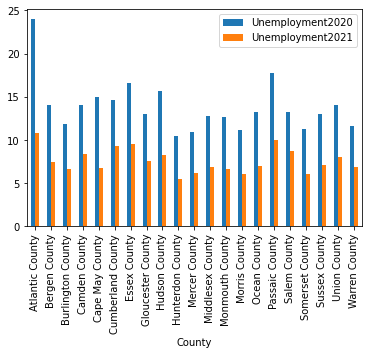

In [40]:
njunemp.plot(x="County", y=["Unemployment2020", "Unemployment2021"], kind="bar") #aok atlantic is interesting--tourism, casinos etc got hit with covid; eg could look at enrollments there! eg rutgers may have more applicants from atlantic!

In [41]:
njunemp = njunemp.rename(columns={'ORG_US_007_001':"LaborForce2021", "ORG_US_Unemployment_027_001":"LaborForce2020"})

In [42]:
njunemp.dtypes

County                          object
Geo_STATE                        int64
LaborForce2021                   int64
ORG_US_007_002                   int64
ORG_US_007_003                   int64
Unemployment2021               float64
LaborForce2020                   int64
ORG_US_Unemployment_027_002      int64
ORG_US_Unemployment_027_003      int64
Unemployment2020               float64
ORG_US_Unemployment_020_001      int64
ORG_US_Unemployment_020_002      int64
ORG_US_Unemployment_020_003      int64
ORG_US_Unemployment_020_004    float64
ORG_US_035_001                 float64
ORG_US_035_002                 float64
ORG_US_035_003                 float64
PercentageChange               float64
dtype: object

In [44]:
njunemp.agg({'LaborForce2020':['mean','median',stdev], 'LaborForce2021':['mean','median',stdev] }) #aok hows that measured? counts? total number of people? then may use sum or total 

,LaborForce2020,LaborForce2021
mean,220332.904762,214303.047619
median,235101.000000,232113.000000
stdev,138358.206270,132198.286191


The shrinking labor force is interesting. This may support the thesis that college education is countercyclical if one of the reasons the labor force is shrinking is because people leave the workforce to attend school. This will be something to test. 

aok yeah; "great resignation" can do dissertation on that, eg by gender, age etc etc

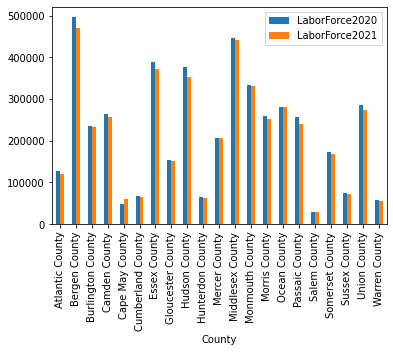

In [45]:
njunemp.plot(x="County", y=["LaborForce2020", "LaborForce2021"], kind="bar")

In [172]:
njunemp['County'] = njunemp['County'].str.replace(' County',' ')

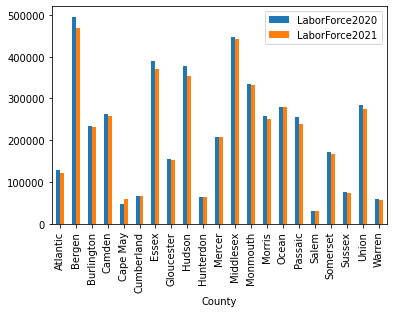

In [173]:
#Just checking to see if I successfully removed 'County.' Later I will undo this because of a merge problem, but my instincts were to clean this up. 
njunemp.plot(x="County", y=["LaborForce2020", "LaborForce2021"], kind="bar")

### Import: Data File 3: New Jersey Zip Codes
Found the data on a background check website - https://www.corragroup.com/new-jersey-county-lookup.html It was the cleanest file and I wanted to test the import from html table code.



In [174]:
#Found this import code at https://towardsdatascience.com/2-easy-ways-to-get-tables-from-a-website-with-pandas-b92fc835e741. I'll save for later. 
pd.read_html('https://www.corragroup.com/new-jersey-county-lookup.html')

[                   City ZIP Code      County
 0                   A C    08401    ATLANTIC
 1              ABERDEEN    07747    MONMOUTH
 2               ABSECON    08201    ATLANTIC
 3       ABSECON HEIGHTS    08201    ATLANTIC
 4     ABSECON HIGHLANDS    08201    ATLANTIC
 ...                 ...      ...         ...
 1250        WRIGHTSTOWN    08562  BURLINGTON
 1251            WYCKOFF    07481      BERGEN
 1252          YARDVILLE    08620      MERCER
 1253           ZAREPATH    08873    SOMERSET
 1254          ZAREPHATH    08890    SOMERSET
 
 [1255 rows x 3 columns]]

In [175]:
pd.read_html('https://www.corragroup.com/new-jersey-county-lookup.html')[0]

,City,ZIP Code,County
0,A C,08401,ATLANTIC
1,ABERDEEN,07747,MONMOUTH
2,ABSECON,08201,ATLANTIC
3,ABSECON HEIGHTS,08201,ATLANTIC
4,ABSECON HIGHLANDS,08201,ATLANTIC
...,...,...,...
1250,WRIGHTSTOWN,08562,BURLINGTON
1251,WYCKOFF,07481,BERGEN
1252,YARDVILLE,08620,MERCER
1253,ZAREPATH,08873,SOMERSET


In [176]:
njzips=pd.read_html('https://www.corragroup.com/new-jersey-county-lookup.html')[0]

In [177]:
njzips.head(3)

,City,ZIP Code,County
0,A C,08401,ATLANTIC
1,ABERDEEN,07747,MONMOUTH
2,ABSECON,08201,ATLANTIC


In [178]:
njzips = njzips.rename(columns={'ZIP Code':"C_Zip"})

In [179]:
njzips.head(3)

,City,C_Zip,County
0,A C,08401,ATLANTIC
1,ABERDEEN,07747,MONMOUTH
2,ABSECON,08201,ATLANTIC


In [180]:
njzips["County"]= njzips["County"].str.title()

In [181]:
njzips.head(3)

,City,C_Zip,County
0,A C,08401,Atlantic
1,ABERDEEN,07747,Monmouth
2,ABSECON,08201,Atlantic


In [57]:
njzips["City"]= njzips["City"].str.title()

## Merging

### Merging Zips

In [182]:
njappdat.dtypes

ID                                                    int64
Final Recommended Decision                           object
Admit-Coming                                          int64
Application Created Date                             object
Days Before the Beginning of Semester                 int64
Reporting Term                                       object
Zip                                                  object
State                                                object
Country                                              object
Most Recent Educational Institution: Account Name    object
Gender                                               object
Race                                                 object
Program Selection: Program Selection Name            object
Admissions Status                                    object
C_Zip                                                object
dtype: object

In [183]:
#Simplified data for merging. This lists all the NJ apps with cleaned Zips. 
njappmerge=njappdat[['ID ','C_Zip']]
njappmerge.head(3)

,ID,C_Zip
2,3,07009
3,4,07726
5,6,08755


In [184]:
print(njappmerge.C_Zip.unique())

['07009' '07726' '08755' '08850' '07052' '07871' '08034' '08107' '07522'
 '08016' '81021' '8904' '08012' '7306' '07450' '08055' '08004' '8102'
 '08002' '08083' '7036' '08003' '08824' '08066' '08031' '08536' '08109'
 '08028' '08527' '08108' '08558' '08904' '08873' '8401' '07304' '08052'
 '08103' '08502' '08088' '8064' '08102' '8002' '08837' '08048' '08007'
 '08005' '08021' '8060' '08081' '08046' '08075' '08053' '08104' '8043'
 '08360' '08901' '08330' '8810' '8033' '08520' '8817' '08204' '07666'
 '08865' '08078' '7960' '08618' '07031' '8054' '08234' '07030' '08057'
 '8505' '07045' '08690' '7111' '08022' '07830' '08753' '07735' '08343'
 '07311' '08105' '08009' '07103' '8104' '7734' '08093' '08611' '07753'
 '07675' '8078' '08065' '8081' '07108' '8059' '08096' '8830' '7055'
 '08833' '8075' '07728' '08010' '8824' '8869' '08071' '8857' '08857'
 '08361' '08205' '08619' '08037' '8012' '08049' '8015' '8077' '7724'
 '07436' '07083' '07060' '08822' '07055' '08861' '07011' '08401' '08061'
 '7203' '

In [185]:
#cleaned the zip codes with missing leading zeroes. This was painfully inefficient. I need to come learn if statement syntax.  
njappmerge=njappmerge.replace({'C_Zip':{'8904':'08904',	'7306':'07306',	'8102':'08102',	'7036':'07036',	'8401':'08401',	'8064':'08064',	'8002':'08002',	'8060':'08060',	'8043':'08043',	'8810':'08810',	'8033':'08033',	'8817':'08817',	'7960':'07960',	'8054':'08054',	'8505':'08505',	'7111':'07111',	'8104':'08104',	'7734':'07734',	'8078':'08078',	'8081':'08081',	'8059':'08059',	'8830':'08830',	'7055':'07055',	'8075':'08075',	'8824':'08824',	'8869':'08869',	'8857':'08857',	'8012':'08012',	'8015':'08015',	'8077':'08077',	'7724':'07724',	'7203':'07203',	'8030':'08030',	'8108':'08108',	'7003':'07003',	'8093':'08093',	'8071':'08071',	'8088':'08088',	'7110':'07110',	'8055':'08055',	'8873':'08873',	'8046':'08046',	'8068':'08068',	'8107':'08107',	'7076':'07076',	'8009':'08009',	'7079':'07079',	'8533':'08533',	'8052':'08052',	'8053':'08053',	'8755':'08755',	'8217':'08217',	'7302':'07302',	'7104':'07104',	'8021':'08021',	'8034':'08034',	'7050':'07050',	'8094':'08094',	'8753':'08753',	'8618':'08618',	'7701':'07701',	'8090':'08090',	'8110':'08110',	'8322':'08322',	'8232':'08232'}})

In [186]:
print(njappmerge.C_Zip.unique())

['07009' '07726' '08755' '08850' '07052' '07871' '08034' '08107' '07522'
 '08016' '81021' '08904' '08012' '07306' '07450' '08055' '08004' '08102'
 '08002' '08083' '07036' '08003' '08824' '08066' '08031' '08536' '08109'
 '08028' '08527' '08108' '08558' '08873' '08401' '07304' '08052' '08103'
 '08502' '08088' '08064' '08837' '08048' '08007' '08005' '08021' '08060'
 '08081' '08046' '08075' '08053' '08104' '08043' '08360' '08901' '08330'
 '08810' '08033' '08520' '08817' '08204' '07666' '08865' '08078' '07960'
 '08618' '07031' '08054' '08234' '07030' '08057' '08505' '07045' '08690'
 '07111' '08022' '07830' '08753' '07735' '08343' '07311' '08105' '08009'
 '07103' '07734' '08093' '08611' '07753' '07675' '08065' '07108' '08059'
 '08096' '08830' '07055' '08833' '07728' '08010' '08869' '08071' '08857'
 '08361' '08205' '08619' '08037' '08049' '08015' '08077' '07724' '07436'
 '07083' '07060' '08822' '08861' '07011' '08061' '07203' '07747' '07109'
 '08030' '08512' '08317' '07003' '08610' '08876' '0

In [187]:
njzips.dtypes

City      object
C_Zip     object
County    object
dtype: object

In [188]:
#This is the simplified data I am going to use to merge. These are the Zips I am going to use to find the county names. 
njzipsmerge=njzips[['C_Zip','County']]
njzipsmerge.head(3)

,C_Zip,County
0,08401,Atlantic
1,07747,Monmouth
2,08201,Atlantic


In [189]:
print(njzipsmerge.C_Zip.unique())

['08401' '07747' '08201' '07102' '07710' '08009' '07820' '07840' '07401'
 '077XX' '08501' '08720' '08001' '07012' '08096' '08865' '07620' '07017'
 '08037' '07821' '08260' '08801' '07032' '08802' '07753' '07712' '08043'
 '08004' '08402' '08403' '08406' '084XX' '08233' '07716' '08085' '08106'
 '07822' '08028' '08202' '070XX' '07717' '07421' '08803' '08005' '08006'
 '08080' '08007' '07422' '07920' '07939' '08742' '07002' '08721' '07202'
 '08008' '08050' '08722' '07416' '07921' '07461' '08223' '07718' '08677'
 '08502' '08270' '07109' '080XX' '0771X' '07823' '07304' '07621' '07087'
 '08757' '07922' '07924' '07201' '08010' '08066' '08011' '08349' '08012'
 '07825' '08504' '07003' '07403' '08804' '07603' '07005' '08505' '08805'
 '08108' '07746' '07720' '08876' '07826' '07827' '07890' '0872X' '07018'
 '08075' '08014' '08302' '08807' '08730' '08203' '08808' '08030' '07926'
 '08015' '07828' '08310' '08210' '08016' '07405' '07829' '0700X' '07830'
 '08107' '08109' '0810X' '08110' '08204' '08212' '0

In [190]:
njzipsmerge['C_Zip'].str.contains('X').sum()

79

In [191]:
#identify partial string to look for
discard = ["X"]
#drop rows that contain the partial string "X" in the C_Zip column
njzipmerge_new = njzipsmerge[~njzipsmerge.C_Zip.str.contains('|'.join(discard))]

In [192]:
njzipmerge_new ['C_Zip'].str.contains('X').sum()

0

In [193]:
print(njzipmerge_new.C_Zip.unique())

['08401' '07747' '08201' '07102' '07710' '08009' '07820' '07840' '07401'
 '08501' '08720' '08001' '07012' '08096' '08865' '07620' '07017' '08037'
 '07821' '08260' '08801' '07032' '08802' '07753' '07712' '08043' '08004'
 '08402' '08403' '08406' '08233' '07716' '08085' '08106' '07822' '08028'
 '08202' '07717' '07421' '08803' '08005' '08006' '08080' '08007' '07422'
 '07920' '07939' '08742' '07002' '08721' '07202' '08008' '08050' '08722'
 '07416' '07921' '07461' '08223' '07718' '08677' '08502' '08270' '07109'
 '07823' '07304' '07621' '07087' '08757' '07922' '07924' '07201' '08010'
 '08066' '08011' '08349' '08012' '07825' '08504' '07003' '07403' '08804'
 '07603' '07005' '08505' '08805' '08108' '07746' '07720' '08876' '07826'
 '07827' '07890' '07018' '08075' '08014' '08302' '08807' '08730' '08203'
 '08808' '08030' '07926' '08015' '07828' '08310' '08210' '08016' '07405'
 '07829' '07830' '08107' '08109' '08110' '08204' '08212' '08232' '07072'
 '08332' '08069' '07008' '07030' '08094' '07758' '0

In [194]:
#Here is the merge of the two. This provides me with the county names of the 
njappzip=njappmerge.merge(njzipmerge_new, on='C_Zip',how='outer',indicator=True)
njappzip.dtypes

ID         float64
C_Zip       object
County      object
_merge    category
dtype: object

In [195]:
njappzip._merge.value_counts() #aok always do this # I still have a lot of unmathced data, but removing the Xs and adding the leading zeroes increased my mathed data by more than 200 records or more than 26%.

both          979
right_only    794
left_only      67
Name: _merge, dtype: int64

In [196]:
#aok then this #first easier one with fewer
njappzip['C_Zip'][njappzip['_merge']=='left_only'].unique() 
#aok aha! bingo! many zips are mutated! like missing leading 0; common mistake; probably someone changed storage from string to numeric and 0 disappeared
#fixed this above, not sure why these zips aren't merging. I do see a 81021 but the rest are NJ Zips. 

array(['08755', '08034', '07522', '81021', '07450', '08102', '08031',
       '08103', '08817', '07960', '08618', '08234', '07311', '08611',
       '08361', '08205', '08861', '08610', '07063', '08844', '08854',
       '07090', '07042', '07013', '08629', '07302', '07050'], dtype=object)

In [197]:
#aok then this
#fixed this above, but there are still a large number not merging. 
njappzip['C_Zip'][njappzip['_merge']=='right_only'].unique() #weird zome zips have XX

array(['08201', '07102', '07710', '07820', '07401', '08501', '08720',
       '08001', '07012', '07620', '07017', '07821', '08260', '08801',
       '07032', '08802', '07712', '08402', '08403', '08406', '08233',
       '07716', '07822', '08202', '07717', '07421', '08803', '08006',
       '07422', '07920', '07939', '08742', '07002', '08721', '07202',
       '08008', '08050', '08722', '07416', '07921', '07461', '08223',
       '07718', '08677', '08270', '07823', '07621', '07087', '08757',
       '07922', '07924', '07201', '08011', '08349', '07825', '08504',
       '07403', '08804', '07603', '07005', '08805', '07746', '07720',
       '07826', '07827', '07890', '07018', '08014', '08807', '08730',
       '08203', '08808', '07926', '07828', '08310', '08210', '07829',
       '08212', '07072', '08332', '07758', '08018', '07927', '08092',
       '08311', '08318', '07831', '07928', '07193', '08089', '07930',
       '07066', '08020', '08510', '08312', '07010', '07721', '07460',
       '08809', '076

In [198]:
njappzip.head(10)
njappzip.tail(10)

,ID,C_Zip,County,_merge
0,3.0,07009,Essex,both
1,3.0,07009,Essex,both
2,4.0,07726,Monmouth,both
3,4.0,07726,Monmouth,both
4,4.0,07726,Monmouth,both
5,6.0,08755,NaN,left_only
6,911.0,08755,NaN,left_only
7,1301.0,08755,NaN,left_only
8,7.0,08850,Middlesex,both
9,14.0,07052,Essex,both


,ID,C_Zip,County,_merge
1830,NaN,08252,Cape May,right_only
1831,NaN,07765,Monmouth,right_only
1832,NaN,08561,Mercer,right_only
1833,NaN,08095,Camden,right_only
1834,NaN,08095,Camden,right_only
1835,NaN,07075,Bergen,right_only
1836,NaN,07075,Bergen,right_only
1837,NaN,07095,Middlesex,right_only
1838,NaN,08620,Mercer,right_only
1839,NaN,08890,Somerset,right_only


In [199]:
njappzip.head(50)

,ID,C_Zip,County,_merge
0,3.0,07009,Essex,both
1,3.0,07009,Essex,both
2,4.0,07726,Monmouth,both
3,4.0,07726,Monmouth,both
4,4.0,07726,Monmouth,both
5,6.0,08755,NaN,left_only
6,911.0,08755,NaN,left_only
7,1301.0,08755,NaN,left_only
8,7.0,08850,Middlesex,both
9,14.0,07052,Essex,both


In [200]:
#It looks like I will need to clean this up a bit. I just want to see where we have the Zip codes and the names of the counties. 
njappzipmerge = njappzip.query("_merge=='both'")
njappzipmerge.head(3)
njappzipmerge.tail(3)

,ID,C_Zip,County,_merge
0,3.0,07009,Essex,both
1,3.0,07009,Essex,both
2,4.0,07726,Monmouth,both


,ID,C_Zip,County,_merge
1043,1517.0,08322,Gloucester,both
1044,1520.0,07040,Essex,both
1045,1520.0,07040,Essex,both


This looks right, but it makes testing the thesis difficult. Even before merging the unemployment data, I can see that the majority of applicants live in Camden county. Ths suggests proximity and place might be more of an indicator than unemployment rate. OLS regression will be required with more variables. 

Text(0.5, 1.0, 'Number of Applications by County')

Text(0, 0.5, 'Number of Applicants')

Text(0.5, 0, 'County Name')

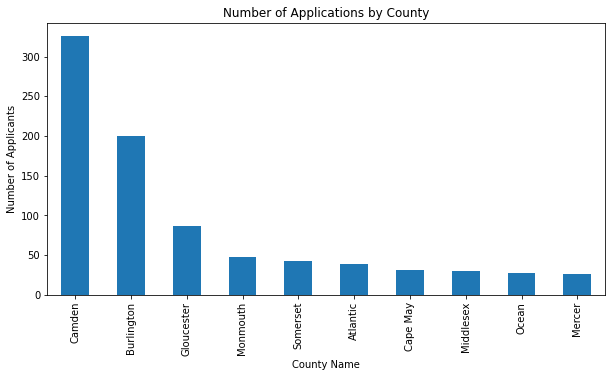

In [203]:
#Cleaning the data and adding more records resulted in a greater range between the county with the most applicants and the county with the tenth most applicants.
#Additionally Somerset, Monmouth, Middlesex, Mercer and Ocean counties changed ranks. These are not insignificant differences. 
njappzipmerge.County.value_counts().nlargest(10).plot(kind='bar',figsize=(10,5))
plt.title("Number of Applications by County")
plt.ylabel("Number of Applicants")
plt.xlabel("County Name")

In [204]:
njunemp.dtypes

County                          object
Geo_STATE                        int64
LaborForce2021                   int64
ORG_US_007_002                   int64
ORG_US_007_003                   int64
Unemployment2021               float64
LaborForce2020                   int64
ORG_US_Unemployment_027_002      int64
ORG_US_Unemployment_027_003      int64
Unemployment2020               float64
ORG_US_Unemployment_020_001      int64
ORG_US_Unemployment_020_002      int64
ORG_US_Unemployment_020_003      int64
ORG_US_Unemployment_020_004    float64
ORG_US_035_001                 float64
ORG_US_035_002                 float64
ORG_US_035_003                 float64
PercentageChange               float64
dtype: object

In [205]:
njunempmerge=njunemp[['County','Unemployment2021','PercentageChange']]
njunempmerge.head(3)

,County,Unemployment2021,PercentageChange
0,Atlantic,10.8,-55.000000
1,Bergen,7.4,-47.517730
2,Burlington,6.6,-44.067797


In [206]:
njappzipmerge.dtypes

ID         float64
C_Zip       object
County      object
_merge    category
dtype: object

In [207]:
print(njappzipmerge.County.unique())

['Essex' 'Monmouth' 'Middlesex' 'Sussex' 'Camden' 'Burlington' 'Hudson'
 'Union' 'Gloucester' 'Ocean' 'Somerset' 'Atlantic' 'Cumberland' 'Mercer'
 'Cape May' 'Bergen' 'Warren' 'Morris' 'Hunterdon' 'Salem' 'Passaic']


In [208]:
njappzipmerge['County'] = njappzipmerge['County'].astype(str) + ' '

<ipython-input-208-cfdbf3609f93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  njappzipmerge['County'] = njappzipmerge['County'].astype(str) + ' '


In [209]:
print(njappzipmerge.County.unique())

['Essex ' 'Monmouth ' 'Middlesex ' 'Sussex ' 'Camden ' 'Burlington '
 'Hudson ' 'Union ' 'Gloucester ' 'Ocean ' 'Somerset ' 'Atlantic '
 'Cumberland ' 'Mercer ' 'Cape May ' 'Bergen ' 'Warren ' 'Morris '
 'Hunterdon ' 'Salem ' 'Passaic ']


In [210]:
njunempmerge.dtypes

County               object
Unemployment2021    float64
PercentageChange    float64
dtype: object

In [211]:
#There is a problem. Counties in this data have a space. 
print(njunempmerge.County.unique())

['Atlantic' 'Bergen' 'Burlington' 'Camden' 'Cape May' 'Cumberland' 'Essex'
 'Gloucester' 'Hudson' 'Hunterdon' 'Mercer' 'Middlesex' 'Monmouth'
 'Morris' 'Ocean' 'Passaic' 'Salem' 'Somerset' 'Sussex' 'Union' 'Warren']


In [212]:
njunempmerge['County'].str.replace(' ','')

0       Atlantic
1         Bergen
2     Burlington
3         Camden
4        CapeMay
5     Cumberland
6          Essex
7     Gloucester
8         Hudson
9      Hunterdon
10        Mercer
11     Middlesex
12      Monmouth
13        Morris
14         Ocean
15       Passaic
16         Salem
17      Somerset
18        Sussex
19         Union
20        Warren
Name: County, dtype: object

In [213]:
print(njunempmerge.County.unique())

['Atlantic' 'Bergen' 'Burlington' 'Camden' 'Cape May' 'Cumberland' 'Essex'
 'Gloucester' 'Hudson' 'Hunterdon' 'Mercer' 'Middlesex' 'Monmouth'
 'Morris' 'Ocean' 'Passaic' 'Salem' 'Somerset' 'Sussex' 'Union' 'Warren']


In [214]:
njunempmerge['County'].str.strip()

0       Atlantic
1         Bergen
2     Burlington
3         Camden
4       Cape May
5     Cumberland
6          Essex
7     Gloucester
8         Hudson
9      Hunterdon
10        Mercer
11     Middlesex
12      Monmouth
13        Morris
14         Ocean
15       Passaic
16         Salem
17      Somerset
18        Sussex
19         Union
20        Warren
Name: County, dtype: object

# Three Merged Files
 

In [215]:
njunempmerge.dtypes

County               object
Unemployment2021    float64
PercentageChange    float64
dtype: object

In [216]:
print(njunempmerge.County.unique())

['Atlantic' 'Bergen' 'Burlington' 'Camden' 'Cape May' 'Cumberland' 'Essex'
 'Gloucester' 'Hudson' 'Hunterdon' 'Mercer' 'Middlesex' 'Monmouth'
 'Morris' 'Ocean' 'Passaic' 'Salem' 'Somerset' 'Sussex' 'Union' 'Warren']


In [217]:
njappzipmerge.dtypes

ID         float64
C_Zip       object
County      object
_merge    category
dtype: object

In [158]:
print(njappzipmerge.County.unique())

['Essex ' 'Monmouth ' 'Middlesex ' 'Sussex ' 'Camden ' 'Burlington '
 'Hudson ' 'Union ' 'Gloucester ' 'Ocean ' 'Somerset ' 'Atlantic '
 'Cumberland ' 'Mercer ' 'Cape May ' 'Bergen ' 'Warren ' 'Morris '
 'Hunterdon ' 'Salem ' 'Passaic ']


In [221]:
njappzipmerge=njappzipmerge.replace({'County':{'Atlantic ':'Atlantic',	'Bergen ':'Bergen',	'Burlington ':'Burlington',	'Camden ':'Camden',	'Cape May ':'Cape May',	'Cumberland ':'Cumberland',	'Essex ':'Essex',	'Gloucester ':'Gloucester',	'Hudson ':'Hudson',	'Hunterdon ':'Hunterdon',	'Mercer ':'Mercer',	'Middlesex ':'Middlesex',	'Monmouth ':'Monmouth',	'Morris ':'Morris',	'Ocean ':'Ocean',	'Passaic ':'Passaic',	'Salem ':'Salem',	'Somerset ':'Somerset',	'Sussex ':'Sussex',	'Union ':'Union',	'Warren ':'Warren'}})

In [219]:
njappzipmerge = njappzipmerge.drop(['_merge'],axis=1)

In [222]:
finalmerge = pd.merge(njunempmerge,njappzipmerge,how='outer',indicator=True)
finalmerge.head(5)
finalmerge.tail(5)

,County,Unemployment2021,PercentageChange,ID,C_Zip,_merge
0,Atlantic,10.8,-55.0,178.0,08401,both
1,Atlantic,10.8,-55.0,920.0,08401,both
2,Atlantic,10.8,-55.0,1074.0,08401,both
3,Atlantic,10.8,-55.0,1336.0,08401,both
4,Atlantic,10.8,-55.0,330.0,08330,both


,County,Unemployment2021,PercentageChange,ID,C_Zip,_merge
974,Warren,6.9,-40.517241,1013.0,08865,both
975,Warren,6.9,-40.517241,1013.0,08865,both
976,Warren,6.9,-40.517241,1013.0,08865,both
977,Warren,6.9,-40.517241,1039.0,07840,both
978,Warren,6.9,-40.517241,1039.0,07840,both


In [223]:
finalmerge._merge.value_counts()

both          979
left_only       0
right_only      0
Name: _merge, dtype: int64

In [224]:
p_table = pd.pivot_table(finalmerge, index=['County'], aggfunc= {'County': 'count', 'Unemployment2021': 'mean', 'PercentageChange': 'mean'})
print(p_table)

            County  PercentageChange  Unemployment2021
County                                                
Atlantic        39        -55.000000              10.8
Bergen          16        -47.517730               7.4
Burlington     200        -44.067797               6.6
Camden         326        -40.425532               8.4
Cape May        31        -55.333333               6.7
Cumberland       8        -36.301370               9.3
Essex           26        -42.771084               9.5
Gloucester      87        -42.307692               7.5
Hudson          15        -47.133758               8.3
Hunterdon        6        -47.115385               5.5
Mercer          26        -43.119266               6.2
Middlesex       30        -46.093750               6.9
Monmouth        47        -47.619048               6.6
Morris          13        -46.428571               6.0
Ocean           28        -46.969697               7.0
Passaic         10        -43.820225              10.0
Salem     

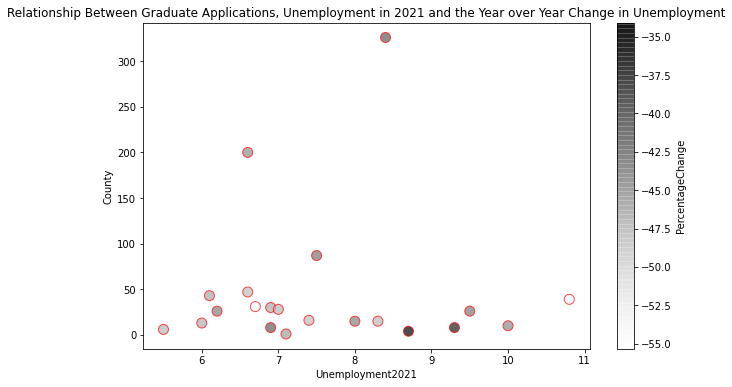

In [225]:
fig, ax = plt.subplots(figsize=(10, 6))
p_table.plot.scatter(x='Unemployment2021', y='County',c='PercentageChange', s=100,alpha=0.7,edgecolors="red",ax=ax) 
plt.title("Relationship Between Graduate Applications, Unemployment in 2021 and the Year over Year Change in Unemployment");

In [227]:
corrM = p_table.corr()
corrM

,County,PercentageChange,Unemployment2021
County,1.000000,0.125847,0.015086
PercentageChange,0.125847,1.000000,0.145336
Unemployment2021,0.015086,0.145336,1.000000


In [228]:
p_table.describe()

,County,PercentageChange,Unemployment2021
count,21.000000,21.000000,21.000000
mean,46.619048,-44.823672,7.595238
std,77.115807,4.966793,1.425299
min,1.000000,-55.333333,5.500000
25%,10.000000,-47.115385,6.600000
50%,26.000000,-45.384615,7.100000
75%,39.000000,-42.771084,8.400000
max,326.000000,-34.090909,10.800000


From this file, I would be interested in running analysis to determine if there was a relationship between unemployment rate, percentage change and the number of applicants. 

My hypothesis is that the data as it is now will be skewed by the enormous number of applicants from Camden and Burlington counties, thus the weak correlation between the number of applications and the Unemployment rate and the change in unemployment rate. As I mentoned earlier, these data points alone would be insufficient. 

**A surprising discovery: I didn't think there were so many applicants from the surrounding cities, even when considering the Rutgers undergraduate pool.**